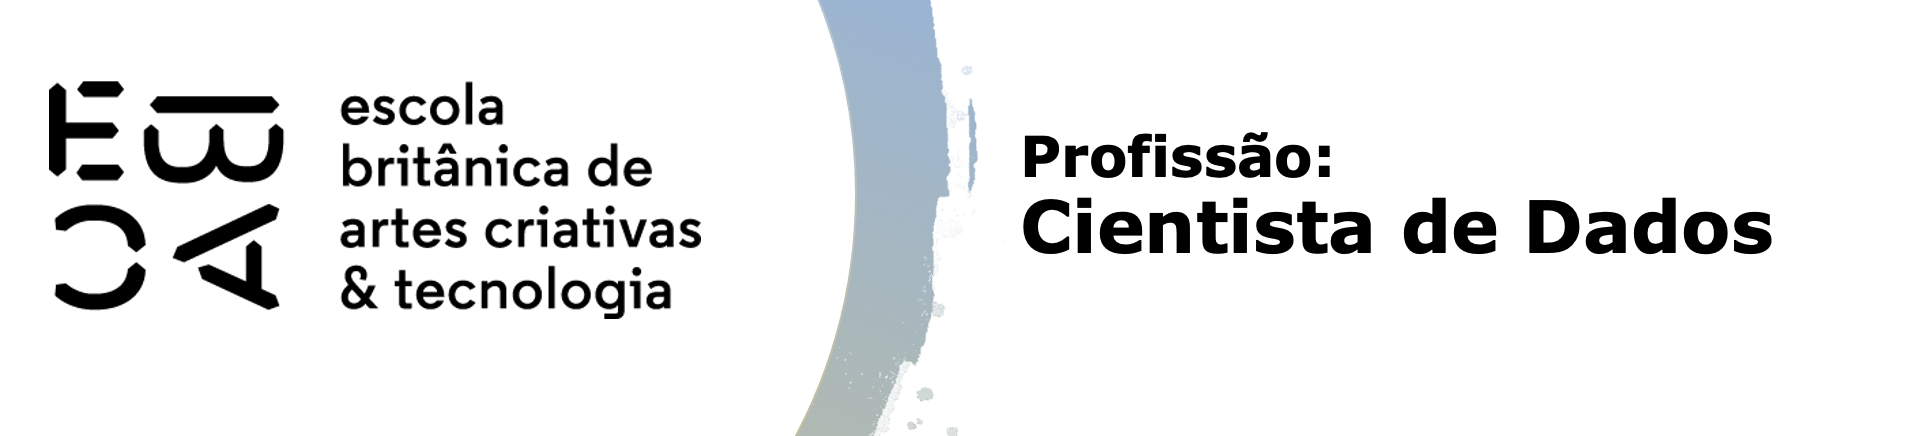

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
# treino
X_train = pd.read_csv('./X_train.csv', index_col=[0, 1])
y_train = pd.read_csv('./y_train.csv', index_col=[0, 1])

# teste
X_test = pd.read_csv('./X_test.csv', index_col=[0, 1])
y_test = pd.read_csv('./y_test.csv', index_col=[0, 1])

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [3]:
%%time
X_train_3 = X_train[['53 tGravityAcc-min()-X', '97 tBodyAccJerk-energy()-X', '42 tGravityAcc-mean()-Y']]
X_test_3 = X_test[['53 tGravityAcc-min()-X', '97 tBodyAccJerk-energy()-X', '42 tGravityAcc-mean()-Y']]

CPU times: total: 0 ns
Wall time: 7.99 ms


In [4]:
%%time
caminho = DecisionTreeClassifier(random_state=123, min_samples_leaf=20).cost_complexity_pruning_path(X_train_3, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
# garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

CPU times: total: 31.2 ms
Wall time: 44 ms


array([0.00000000e+00, 6.37845619e-06, 6.59906426e-06, 6.62489669e-06,
       8.16104461e-06, 9.37463354e-06, 1.09347330e-05, 1.18658998e-05,
       1.19176477e-05, 1.30090223e-05, 2.48717550e-05, 2.66814536e-05,
       2.70857181e-05, 2.99996588e-05, 3.08527296e-05, 3.49759055e-05,
       4.40266880e-05, 4.42374381e-05, 4.98730504e-05, 5.21042303e-05,
       5.87197700e-05, 5.87438562e-05, 6.19939373e-05, 7.53327195e-05,
       7.87469217e-05, 8.26514396e-05, 8.63850766e-05, 1.00501753e-04,
       1.07339848e-04, 1.15402620e-04, 1.15764621e-04, 1.29216540e-04,
       1.38057158e-04, 1.40490628e-04, 1.63982767e-04, 1.68717458e-04,
       1.74866530e-04, 1.87264759e-04, 2.04968227e-04, 2.08073677e-04,
       2.33658480e-04, 2.35351337e-04, 2.39400607e-04, 2.51169457e-04,
       2.63533732e-04, 2.65233950e-04, 2.79807244e-04, 3.01505259e-04,
       3.02620746e-04, 3.30733322e-04, 3.50969123e-04, 3.76274354e-04,
       4.20778699e-04, 4.28513866e-04, 4.32101227e-04, 4.42083253e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [5]:
%%time
clf = DecisionTreeClassifier(random_state=123)
grid_parametros = {'ccp_alpha': ccp_alphas[::10]}
grid_parametros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 2.48717550e-05, 5.87197700e-05, 1.15764621e-04,
        2.33658480e-04, 3.50969123e-04, 4.79790445e-04, 6.79050238e-04,
        1.08171624e-03, 2.18481278e-03, 5.47754776e-03])}

In [6]:
%%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_3, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START ccp_alpha=0.0.............................................
[CV 1/10; 1/11] END ..............ccp_alpha=0.0;, score=0.803 total time=   0.0s
[CV 2/10; 1/11] START ccp_alpha=0.0.............................................
[CV 2/10; 1/11] END ..............ccp_alpha=0.0;, score=0.736 total time=   0.0s
[CV 3/10; 1/11] START ccp_alpha=0.0.............................................
[CV 3/10; 1/11] END ..............ccp_alpha=0.0;, score=0.841 total time=   0.0s
[CV 4/10; 1/11] START ccp_alpha=0.0.............................................
[CV 4/10; 1/11] END ..............ccp_alpha=0.0;, score=0.676 total time=   0.0s
[CV 5/10; 1/11] START ccp_alpha=0.0.............................................
[CV 5/10; 1/11] END ..............ccp_alpha=0.0;, score=0.721 total time=   0.0s
[CV 6/10; 1/11] START ccp_alpha=0.0.............................................
[CV 6/10; 1/11] END ..............ccp_alpha=0.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.48717550e-05, 5.87197700e-05, 1.15764621e-04,
       2.33658480e-04, 3.50969123e-04, 4.79790445e-04, 6.79050238e-04,
       1.08171624e-03, 2.18481278e-03, 5.47754776e-03])},
             verbose=100)

In [7]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046773,0.003092,0.008593,0.001496,0.000000,{'ccp_alpha': 0.0},0.802989,0.736413,0.840816,0.676190,0.721088,0.756463,0.775510,0.764626,0.831293,0.782313,0.768770,0.047497,7
1,0.051470,0.005711,0.007496,0.001431,0.000025,{'ccp_alpha': 2.4871755013212743e-05},0.802989,0.736413,0.840816,0.676190,0.721088,0.756463,0.775510,0.764626,0.831293,0.782313,0.768770,0.047497,7
2,0.052269,0.006354,0.007795,0.001660,0.000059,{'ccp_alpha': 5.8719770042441315e-05},0.802989,0.736413,0.840816,0.676190,0.721088,0.756463,0.775510,0.764626,0.831293,0.782313,0.768770,0.047497,7
3,0.049572,0.005747,0.006297,0.001268,0.000116,{'ccp_alpha': 0.00011576462117599516},0.802989,0.736413,0.840816,0.676190,0.721088,0.756463,0.775510,0.764626,0.831293,0.782313,0.768770,0.047497,7
4,0.043075,0.002113,0.005697,0.000458,0.000234,{'ccp_alpha': 0.00023365847971397458},0.786685,0.737772,0.851701,0.684354,0.723810,0.757823,0.771429,0.770068,0.843537,0.789116,0.771629,0.048330,5


In [8]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

8
{'ccp_alpha': 0.0010817162374561727}
0.7789746007098491


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [9]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=123, ccp_alpha=melhor_ccp).fit(X_train_3, y_train)
clf.score(X_test_3, y_test)

0.7020699015948422

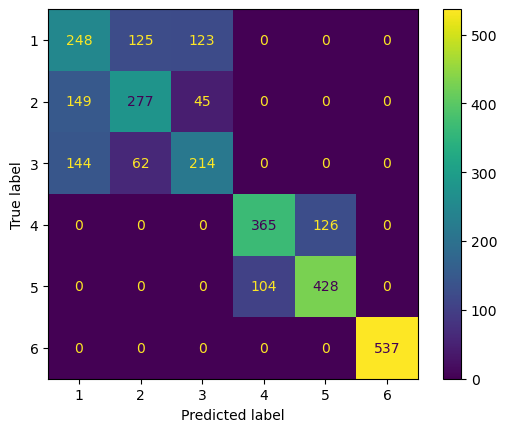

In [10]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_3, y_test)

In [11]:
acuracia_1 = 2069/2947
print(f"{acuracia_1*100:.2f}%")

70.21%


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [12]:
melhor_arvore = grid.best_estimator_
y_pred = melhor_arvore.predict(X_test_3)

In [13]:
cm = confusion_matrix(y_test, y_pred)
erros_por_classe = cm.sum(axis=1) - np.diag(cm)
classe_maior_erro = np.argmax(erros_por_classe)

print(f"A classe com mais erro é: {classe_maior_erro}")

A classe com mais erro é: 0


In [14]:
y_train_dummy = pd.get_dummies(y_train['0'])
# y_train_dummy
y_train_3 = y_train_dummy[2].to_frame()
y_train_3

,,2
,Subject,
0,1,False
1,1,False
2,1,False
3,1,False
4,1,False
...,...,...
7347,30,True
7348,30,True
7349,30,True


In [15]:
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=20, max_depth=4).fit(X_train, y_train_3)
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis

74 tGravityAcc-arCoeff()-Z,1       0.336087
331 fBodyAcc-bandsEnergy()-1,8     0.308642
124 tBodyGyro-std()-X              0.066982
42 tGravityAcc-mean()-Y            0.063056
560 angle(Y,gravityMean)           0.053064
                                     ...   
188 tBodyGyroJerk-arCoeff()-X,3    0.000000
187 tBodyGyroJerk-arCoeff()-X,2    0.000000
186 tBodyGyroJerk-arCoeff()-X,1    0.000000
185 tBodyGyroJerk-entropy()-Z      0.000000
561 angle(Z,gravityMean)           0.000000
Length: 561, dtype: float64

In [16]:
X_train_3 = X_train[['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8', '124 tBodyGyro-std()-X']]
X_test_3 = X_test[['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8', '124 tBodyGyro-std()-X']]

In [17]:
caminho = DecisionTreeClassifier(random_state=123, min_samples_leaf=20).cost_complexity_pruning_path(X_train_3, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 6.26536890e-06, 7.68794058e-06, 8.26772494e-06,
       9.97344437e-06, 1.62755875e-05, 2.85462788e-05, 2.90536514e-05,
       3.05715322e-05, 3.24166929e-05, 3.46226135e-05, 4.34459928e-05,
       4.62738549e-05, 4.96063496e-05, 5.09274489e-05, 6.22971515e-05,
       6.85854055e-05, 6.95695110e-05, 6.97989634e-05, 7.25584164e-05,
       7.31946532e-05, 7.50156626e-05, 7.84100365e-05, 7.88129249e-05,
       7.93059746e-05, 8.08880966e-05, 8.10854901e-05, 8.21992661e-05,
       8.53544794e-05, 8.78297929e-05, 8.84113166e-05, 8.91384798e-05,
       9.04427455e-05, 9.47032840e-05, 9.73985013e-05, 9.79109453e-05,
       9.89670749e-05, 1.05680132e-04, 1.06544679e-04, 1.08577760e-04,
       1.09720711e-04, 1.12362208e-04, 1.13288960e-04, 1.21944613e-04,
       1.22595984e-04, 1.30608850e-04, 1.31225888e-04, 1.31250988e-04,
       1.36017410e-04, 1.39401069e-04, 1.40202561e-04, 1.40508874e-04,
       1.41629317e-04, 1.42364889e-04, 1.42818281e-04, 1.46650248e-04,
      

In [18]:
grid_parametros = {'ccp_alpha': ccp_alphas[::10]}
grid_parametros

{'ccp_alpha': array([0.00000000e+00, 3.46226135e-05, 7.31946532e-05, 8.84113166e-05,
        1.09720711e-04, 1.40202561e-04, 1.53575213e-04, 1.70027252e-04,
        1.95713940e-04, 2.29405140e-04, 2.44831338e-04, 2.71027645e-04,
        3.05094861e-04, 3.40024519e-04, 4.10296994e-04, 4.56983169e-04,
        6.35236979e-04, 7.73852436e-04, 1.12720353e-03, 2.40521301e-03,
        9.46813721e-03])}

In [19]:
%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parametros, cv=10, verbose=100)
grid.fit(X_train_3, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 21 candidates, totalling 210 fits
[CV 1/10; 1/21] START ccp_alpha=0.0.............................................
[CV 1/10; 1/21] END ..............ccp_alpha=0.0;, score=0.588 total time=   0.0s
[CV 2/10; 1/21] START ccp_alpha=0.0.............................................
[CV 2/10; 1/21] END ..............ccp_alpha=0.0;, score=0.518 total time=   0.0s
[CV 3/10; 1/21] START ccp_alpha=0.0.............................................
[CV 3/10; 1/21] END ..............ccp_alpha=0.0;, score=0.527 total time=   0.0s
[CV 4/10; 1/21] START ccp_alpha=0.0.............................................
[CV 4/10; 1/21] END ..............ccp_alpha=0.0;, score=0.567 total time=   0.0s
[CV 5/10; 1/21] START ccp_alpha=0.0.............................................
[CV 5/10; 1/21] END ..............ccp_alpha=0.0;, score=0.578 total time=   0.0s
[CV 6/10; 1/21] START ccp_alpha=0.0.............................................
[CV 6/1

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=20,
                                              random_state=123),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.46226135e-05, 7.31946532e-05, 8.84113166e-05,
       1.09720711e-04, 1.40202561e-04, 1.53575213e-04, 1.70027252e-04,
       1.95713940e-04, 2.29405140e-04, 2.44831338e-04, 2.71027645e-04,
       3.05094861e-04, 3.40024519e-04, 4.10296994e-04, 4.56983169e-04,
       6.35236979e-04, 7.73852436e-04, 1.12720353e-03, 2.40521301e-03,
       9.46813721e-03])},
             verbose=100)

In [20]:
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028384,0.008265,0.005795,0.000599,0.000000,{'ccp_alpha': 0.0},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
1,0.030182,0.003788,0.007497,0.002010,0.000035,{'ccp_alpha': 3.462261351271166e-05},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
2,0.028482,0.001962,0.006997,0.000894,0.000073,{'ccp_alpha': 7.319465319654563e-05},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
3,0.029582,0.002576,0.006997,0.001787,0.000088,{'ccp_alpha': 8.841131664853079e-05},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
4,0.027783,0.001534,0.006997,0.001731,0.000110,{'ccp_alpha': 0.00010972071091766436},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
5,0.027784,0.001720,0.006497,0.001025,0.000140,{'ccp_alpha': 0.00014020256131246338},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
6,0.027583,0.002153,0.006796,0.001400,0.000154,{'ccp_alpha': 0.00015357521318284332},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
7,0.029181,0.004599,0.006498,0.000499,0.000170,{'ccp_alpha': 0.0001700272517852425},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
8,0.029282,0.001900,0.006898,0.000943,0.000196,{'ccp_alpha': 0.00019571394027324395},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2
9,0.028685,0.002493,0.006798,0.000874,0.000229,{'ccp_alpha': 0.00022940513963364863},0.588315,0.517663,0.526531,0.567347,0.578231,0.548299,0.589116,0.601361,0.711565,0.644898,0.587333,0.054318,2


In [21]:
print(grid.best_index_)
print(grid.best_params_)
print(grid.best_score_)

19
{'ccp_alpha': 0.0024052130082269085}
0.5892370970127181


In [22]:
melhor_ccp = resultados.iloc[grid.best_index_, 4]
clf = DecisionTreeClassifier(random_state=123, ccp_alpha=melhor_ccp).fit(X_train_3, y_train)
clf.score(X_test_3, y_test)

0.5907702748557856

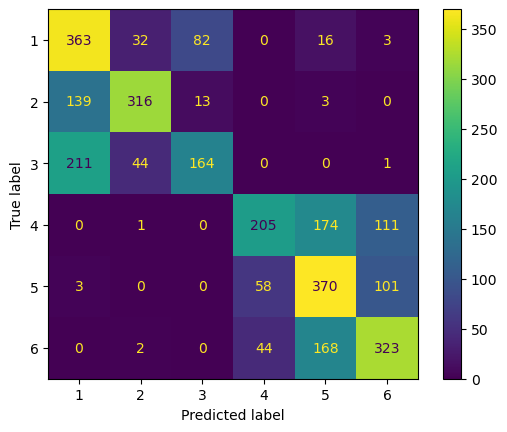

In [23]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_3, y_test)

In [24]:
print(f"{acuracia_1*100:.2f}%")

70.21%


In [25]:
acuracia_2 = 1741/2944
print(f"{acuracia_2*100:.2f}%")

59.14%


Houve uma perda de acurácia na tentativa de melhorar a árvore. Existiu uma melhora nas duas primeiras classes, porém nas outras 4 ocorreu o inverso, fazendo com que a acurácia diminuisse 11% em comparação com a primeira árvore.
Isso pode ter ocorrido devido à possíveis perdas de informação ao transformar uma variável em binária ou overfiting, dentre outros.